**Question-1 :PREDICT DELIVERY TIME USING SORTING TIME**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

IMPORTING DATASET

In [ ]:
data= pd.read_csv('/content/delivery_time.csv')
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


EDA AND VISUALISATION

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [ ]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


<ipython-input-4-bd3871f5a399>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


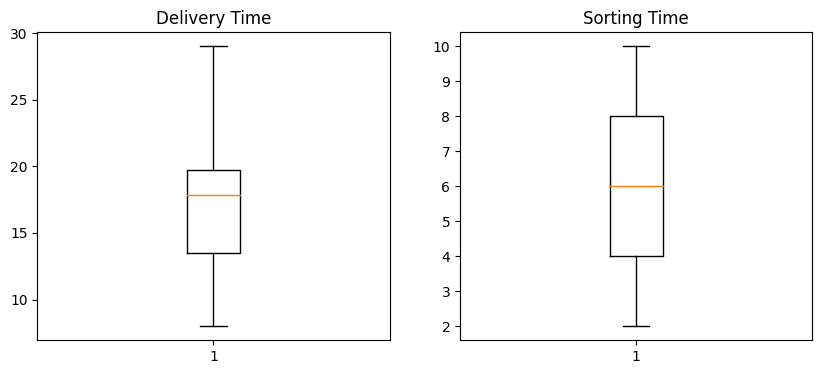

In [ ]:
plt.subplots(figsize=(10,4))
plt.subplot(121)
plt.boxplot(data['Delivery Time'])
plt.title('Delivery Time')
plt.subplot(122)
plt.boxplot(data['Sorting Time'])
plt.title('Sorting Time')
plt.show()

There are no outliers present.

<ipython-input-6-fd8df65c5d1c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Delivery Time'])


<Axes: xlabel='Delivery Time', ylabel='Density'>

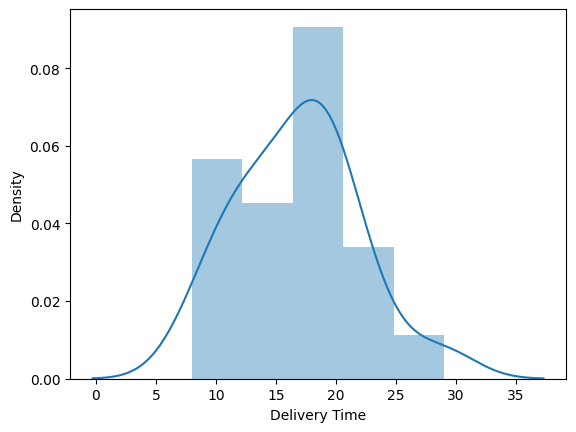

In [ ]:
sns.distplot(data['Delivery Time'])

<ipython-input-7-971e7a7bfcf0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Sorting Time'])


<Axes: xlabel='Sorting Time', ylabel='Density'>

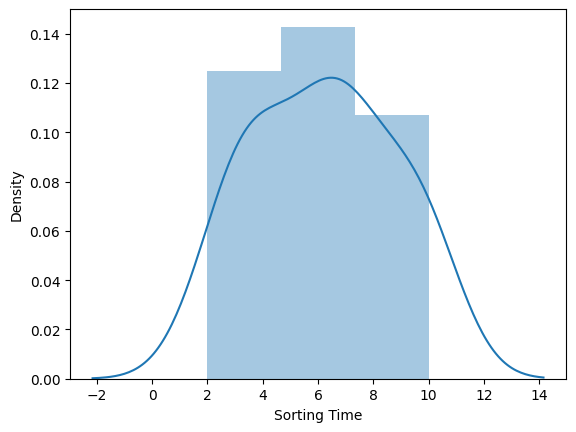

In [ ]:
sns.distplot(data['Sorting Time'])

Renaming the column name

In [ ]:
data = data.rename({'Delivery Time':'Delivery_Time','Sorting Time' : 'Sorting_Time'},axis=1)
data.head()

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


Checking Correlation

In [ ]:
data.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


<Axes: xlabel='Sorting_Time', ylabel='Delivery_Time'>

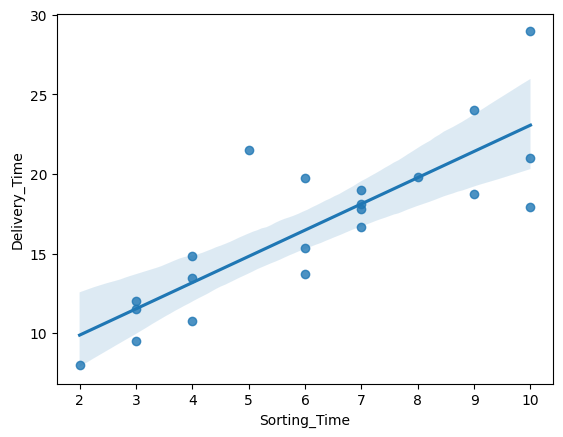

In [ ]:
sns.regplot(x=data['Sorting_Time'],y=data['Delivery_Time'])

We can observe that there is good correlation between two variable i.e. 0.82.

**MODEL BUILDING**

In [ ]:
model= smf.ols("Delivery_Time~Sorting_Time" , data=data).fit()  #Y~X

In [ ]:
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [ ]:
model.tvalues , model.pvalues

(Intercept       3.823349
 Sorting_Time    6.387447
 dtype: float64,
 Intercept       0.001147
 Sorting_Time    0.000004
 dtype: float64)

In [ ]:
model.rsquared , model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [ ]:
#Manual prediction for sorting time 8
delivery_time = (6.582734) +  (1.649020)*(8)
delivery_time

19.774894

In [ ]:
# Predicting the values automatically
data1 = pd.Series([8,9])
data1

0    8
1    9
dtype: int64

In [ ]:
data_pred = pd.DataFrame(data1,columns=['Sorting_Time'])
data_pred

,Sorting_Time
0,8
1,9


In [ ]:
model.predict(data_pred)

0    19.774893
1    21.423913
dtype: float64

**Question-2 : BUILD A PREDICTION MODEL FOR SALARY HIKE.**

In [ ]:
#importing data
Data = pd.read_csv('/content/Salary_Data.csv')
Data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


EDA & VISUALISATION

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [ ]:
Data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


<ipython-input-38-0c26ced20518>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


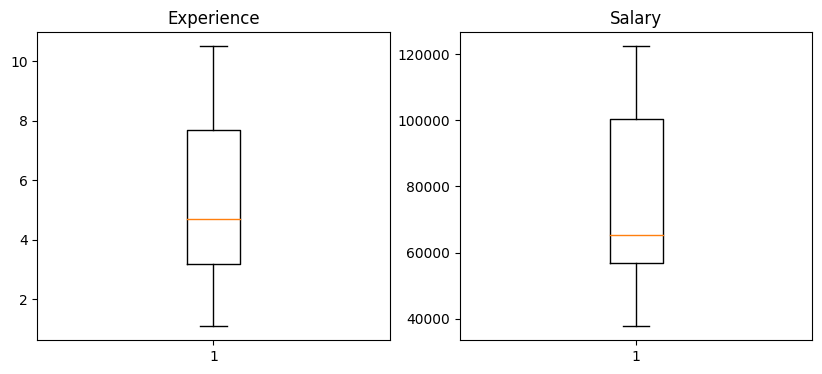

In [ ]:
plt.subplots(figsize=(10,4))
plt.subplot(121)
plt.boxplot(Data['YearsExperience'])
plt.title('Experience')
plt.subplot(122)
plt.boxplot(Data['Salary'])
plt.title('Salary')
plt.show()

From the above analysis we can say that no outliers are present in the data.

<ipython-input-39-5846a991b264>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Data['YearsExperience'])


<Axes: xlabel='YearsExperience', ylabel='Density'>

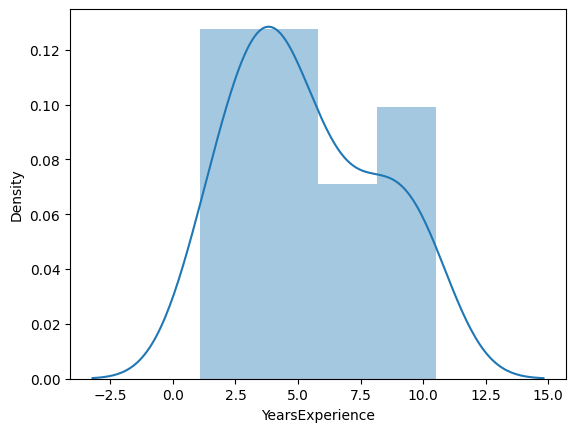

In [ ]:
sns.distplot(Data['YearsExperience'])

<ipython-input-40-c54254fe712e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Data['Salary'])


<Axes: xlabel='Salary', ylabel='Density'>

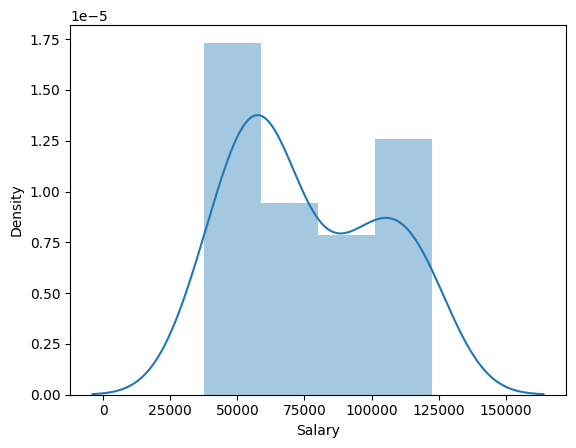

In [ ]:
sns.distplot(Data['Salary'])

Correlation Analysis

In [ ]:
Data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


High correlation is present.

<Axes: xlabel='YearsExperience', ylabel='Salary'>

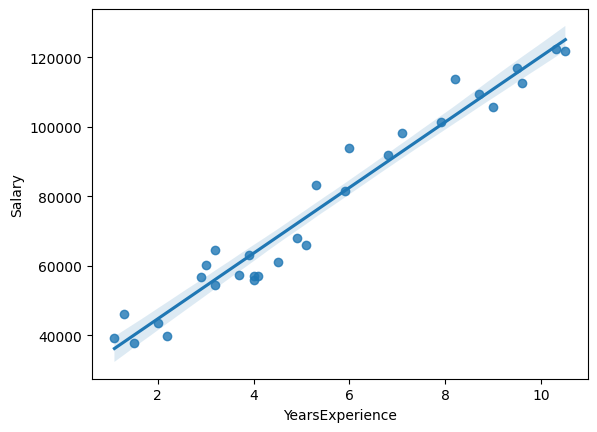

In [ ]:
sns.regplot(x=Data['YearsExperience'],y=Data['Salary'])

In [ ]:
Model= smf.ols("Salary~YearsExperience" , data=Data).fit()

In [ ]:
Model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [ ]:
Model.tvalues , Model.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [ ]:
Model.rsquared , Model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

High R-squared value is there, hence the model is good.

Model Prediction

In [ ]:
#manual prdiction for 2 years
salary = ( 25792.200199) +(9449.962321)*(2)
salary

44692.124841

Automatic prediction for 2 & 5

In [ ]:
Data1 = pd.Series([2,5])
Data1

0    2
1    5
dtype: int64

In [ ]:
Data_pred = pd.DataFrame(Data1,columns=['YearsExperience'])
Data_pred

,YearsExperience
0,2
1,5


In [ ]:
Model.predict(Data_pred)

0    44692.124842
1    73042.011806
dtype: float64